In [32]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

torchvision.__version__

'0.24.0+cu126'

In [33]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform=ToTensor(),
)

In [39]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

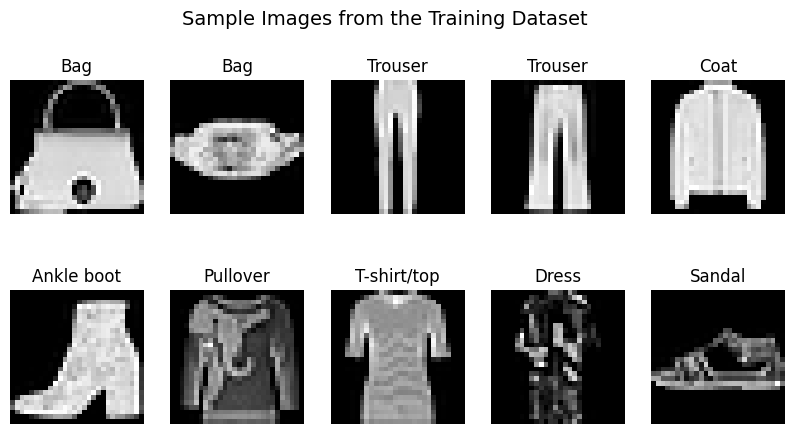

In [42]:
import matplotlib.pyplot as plt

# Get a batch of images from the training loader
images, labels = next(iter(train_loader))

# Create a figure
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.suptitle("Sample Images from the Training Dataset", fontsize=14)
plt.show()


In [34]:
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self , input_shape, hidden_units , output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )


  def forward(self , x):
    return self.layer_stack(x)

In [35]:
torch.manual_seed(42)

model_0 = FashionMNISTModel(input_shape=784 ,
                            hidden_units= 64,
                            output_shape=10)

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0.to(device)


FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [37]:
# =========================
# Training the neural network
# =========================

# Create a DataLoader to iterate over the training dataset in batches
from torch.utils.data import DataLoader
train_loader = DataLoader(
    train_data,
    batch_size=32,
    shuffle=True
)

# Number of training epochs
# Kept small on purpose for faster experimentation and clarity
epochs = 5

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# Training loop
for epoch in range(epochs):
    model_0.train()  # set model to training mode
    total_loss = 0  # track loss for this epoch

    for X, y in train_loader:
        # Move data to the same device as the model (CPU or GPU)
        X = X.to(device)
        y = y.to(device)

        # Forward pass: get model predictions
        outputs = model_0(X)
        loss = loss_fn(outputs, y)

        # Backward pass and optimization step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss for logging
        total_loss += loss.item()

    # Average loss over all batches in this epoch
    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch + 1}/{epochs} | Training Loss: {avg_loss:.4f}")




Epoch 1/5 | Training Loss: 0.5567
Epoch 2/5 | Training Loss: 0.4002
Epoch 3/5 | Training Loss: 0.3571
Epoch 4/5 | Training Loss: 0.3305
Epoch 5/5 | Training Loss: 0.3129


In [43]:
# =========================
# Evaluating the model on test data
# =========================

# Switch the model to evaluation mode
# This disables training-specific behavior
model_0.eval()

# Variables to track performance
correct_predictions = 0
total_predictions = 0
test_loader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False
)

# Disable gradient tracking since we are not training
with torch.no_grad():
    for X, y in test_loader:
        # Move data to the same device as the model
        X = X.to(device)
        y = y.to(device)

        # Forward pass: get model outputs
        outputs = model_0(X)

        # Get the predicted class (index of the highest score)
        _, predictions = torch.max(outputs, dim=1)

        # Update counters
        total_predictions += y.size(0)
        correct_predictions += (predictions == y).sum().item()

# Calculate accuracy
test_accuracy = 100 * correct_predictions / total_predictions

print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 87.26%


## What I Learned

- How to build and train a simple neural network using PyTorch
- The difference between training and evaluation (`model.train()` vs `model.eval()`)
- Why `torch.no_grad()` is used during evaluation
- How to debug training loops and logging issues
- How to visualize data and model predictions
